<a href="https://colab.research.google.com/github/mdegnan200/MiniProject3/blob/main/Unit3Miniproject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is where the data dictionary is and the dataset
https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

# Requirements as interpreted by me
Inspect the dataset provided by insructor.

Review the Data Dictionary and understand the data elements.

Decide that the most important aspect of the data to me is that each row indicates an arrest.  So basically to determine where to focus energy and financial committment to minimize crime, I need to understand who, when, where the crimes are be committed.  

Determine what I want to investigate within this data. 
1.  I decide that I will conduct my initial analysis on the full dataset (all crimes).  
2.  But then decide to repeat that same analysis on a subset of more 'serious' crimes which I define as felonies and violent crimes to see if that analysis yeilds different results.    

**Here is what I found:**
1.  Date of crime seems to have minimal significance and becuase of other variabbles (COVID spikes in 2019) I decide to put-aside date analysis of the data. 
2.  Gender has high-signficance in arrest data.  Males are much more likely to get arrested for crimes. 
3.  Age has fairly high significance.  The 65+ and < 18 group has very low arrests.  
4.  Four of the five boroughs had similar arrest counts.  Staten Island was significant lower than the other NYC boroughs.  Glad my daughter went to college on Staten Island!!
5.  Unfortunately (but not surprisingly) race is a major factor in understanding the arrest data.  Person with a race of 'Black' had more than double the arrests than the next highest race identified: 'White Hisplanic'.  This makes us question, 'Is this indicative of who is committing crimes or who is more likely to be arrested?'  More data analysis (maybe on convictions vs arrests) would need to be done to determine that very delicate question.  

My second series of analysis on the Violent Crimes including felonies shows a dataframe that has both rows filtered (only violent and felonies) and columns filtered and renamed.  I found that by focusing on the more serious crimes, the analysis really remained the same.  The same 5 points that I note above for the entire dataset also apply to the data filtered to select only violent crimes and felonies.  This can clearly been see in the final five bar charts.  

**Proposal:** 

The suggestion based on this analysis is in order to deter future crime, education and support programs should be focused on Black and Hispanic Males less than 45 old living in Queens, Brooklyn, Manhatten and the Bronx.  Focusing on supporting this demographic move away from crime, will hopefully lessen the arrest rates for said demographic anhd reduce crime in NYC.   
 


**Importing My Libraries and my Dataset.**  Since I am inporting into my Collab notebook (using the folder function on the left) I need to import every time I re-open.   

In [50]:
import pandas as pd
df = pd.read_csv ('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

**Let's see what this dataset looks like.**
How many columns.  How many rows.  What are the data types.  

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

**Let's identify the Arrest Month.**  
I am wondering if a particular month sees higher arrest rates.  Does not really look like it.  
I am a bit surprised.  I was expecting more crime in the 'Dog Days' of the summer.  

In [53]:
df['Arrest Month'] = pd.DatetimeIndex(df['ARREST_DATE']).month
df.head()


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002),12
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007),11
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005),10
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008),10
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004),9


In [54]:
df.groupby(['Arrest Month']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
Arrest Month,,,,,,,,,,,,,,,,,,,
1,13506,13506,13503,13503,13503,13503,13506,13413,13506,13506,13506,13506,13506,13506,13506,13506,13506,13506,13506
2,11653,11653,11651,11650,11650,11650,11653,11531,11653,11653,11653,11653,11653,11653,11653,11653,11653,11653,11653
3,13980,13980,13976,13976,13976,13976,13980,13844,13980,13980,13980,13980,13980,13980,13980,13980,13980,13980,13980
4,10424,10424,10422,10421,10421,10421,10424,10299,10424,10424,10424,10424,10424,10424,10424,10424,10424,10424,10424
5,11822,11822,11820,11820,11820,11820,11822,11703,11822,11822,11822,11822,11822,11822,11822,11822,11822,11822,11822
6,12850,12850,12850,12841,12841,12841,12850,12730,12850,12850,12850,12850,12850,12850,12850,12850,12850,12850,12850
7,13561,13561,13557,13551,13551,13551,13561,13464,13561,13561,13561,13561,13561,13561,13561,13561,13561,13561,13561
8,13745,13745,13743,13737,13737,13737,13745,13607,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745,13745
9,13756,13756,13754,13737,13737,13737,13756,13628,13756,13756,13756,13756,13756,13756,13756,13756,13756,13756,13756


**NOT going to pursue Crime Rates based on date because I feel like there is not a clear relevance.**

At first I wonder if certain dates (singificant dates within the year) are more 'crime-heavy'.  I see that 9/21/21 has the highest number of crimes reported with 701.  Next is 10/13/21 with 683.  Third highest is 11/17/21 with 649.  Hmmm.  All in the fall.  Maybe significant?  But maybe COVID spikes had some bearing on the crime rate too.  I am not going to pursue understanding the impact of date on crime rates as I feel there are too many variables.  

In [55]:
df.groupby(['ARREST_DATE']).count()

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
ARREST_DATE,,,,,,,,,,,,,,,,,,,
01/01/2021,442,442,442,442,442,442,440,442,442,442,442,442,442,442,442,442,442,442,442
01/02/2021,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386
01/03/2021,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307
01/04/2021,359,359,359,359,359,359,357,359,359,359,359,359,359,359,359,359,359,359,359
01/05/2021,592,592,592,592,592,592,591,592,592,592,592,592,592,592,592,592,592,592,592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2021,297,297,297,297,297,297,285,297,297,297,297,297,297,297,297,297,297,297,297
12/28/2021,359,359,358,358,358,359,355,359,359,359,359,359,359,359,359,359,359,359,359
12/29/2021,366,366,366,366,366,366,365,366,366,366,366,366,366,366,366,366,366,366,366


**Bar Chart Shows Fairly Even Crime Count Across Months**

I was very happy to figure out how to label my values in my chart.  Took some digging, but I like the look of it much better  

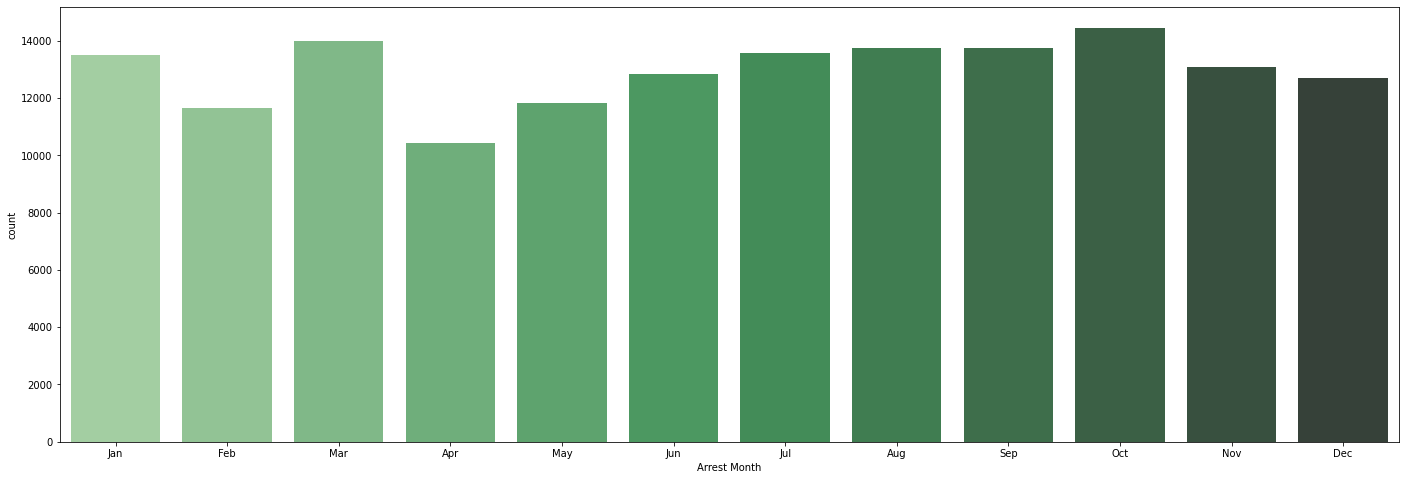

In [56]:
plt.figure(figsize=(24,8))
sns.countplot(x="Arrest Month", data=df, palette="Greens_d")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels = ("Jan","Feb", "Mar","Apr","May", "Jun", "Jul","Aug", "Sep", "Oct","Nov", "Dec")
plt.xticks(positions, labels)
plt.show()

**Lets now look at full dataset by Crime Description Counts**

There are 241 various descriptions.  Can't use the crime description to chart out and compare.  Too many.

In [57]:
df.groupby(['PD_DESC']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
PD_DESC,,,,,,,,,,,,,,,,,,,
"A.B.C.,FALSE PROOF OF AGE",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"ACCOSTING,FRAUDULENT",34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
"ADM.CODE,UNCLASSIFIED MISDEMEA",11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
"ADM.CODE,UNCLASSIFIED VIOLATIO",14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
AGGRAVATED CRIMINAL CONTEMPT,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEAPONS POSSESSION 3,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888
"WEAPONS, POSSESSION, ETC",1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726,1726
"WEAPONS,MFR,TRANSPORT,ETC.",6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


**Let's now Review full dataset by Age Group.**



In [58]:
df.groupby(['AGE_GROUP']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
AGE_GROUP,,,,,,,,,,,,,,,,,,,
18-24,28951,28951,28946,28927,28927,28927,28951,28765,28951,28951,28951,28951,28951,28951,28951,28951,28951,28951,28951
25-44,88850,88850,88837,88787,88787,88787,88850,87936,88850,88850,88850,88850,88850,88850,88850,88850,88850,88850,88850
45-64,30608,30608,30599,30595,30595,30595,30608,30342,30608,30608,30608,30608,30608,30608,30608,30608,30608,30608,30608
65+,2298,2298,2296,2296,2296,2296,2298,2271,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298
<18,4800,4800,4800,4799,4799,4799,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800


**The Bar Chart is very telling when reviweing by Age Group.**

It is very sad to see so many crimes being committed by the 25-48 age group.  But even sadder is the high level for the 18-24 year olds.  Not surprising that the 65+ age group is the lowest.  They either no longer have the energy to commit crimes or are getting smarter about getting caught!

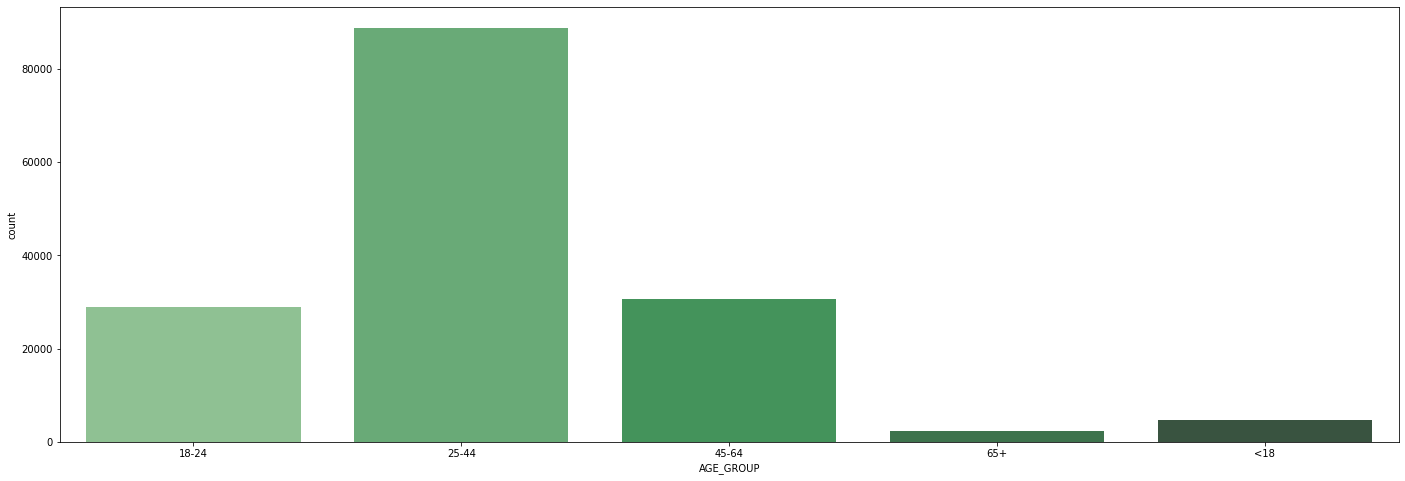

In [59]:
 plt.figure(figsize=(24,8))
 sns.countplot(x="AGE_GROUP", data=df, palette="Greens_d")

**Analysis of Dataset by Race**

Unfortunately this is what I feared.  This is what is consistently reported on the news.  Black and Hispanics have many more arrests that other races.  We need to better understand why.  Is it because these folks are actually committing more crimes or are only getting arrested more.  

In [60]:
df.groupby(['PERP_RACE']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
PERP_RACE,,,,,,,,,,,,,,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,443,443,443,442,442,442,443,443,443,443,443,443,443,443,443,443,443,443,443
ASIAN / PACIFIC ISLANDER,8593,8593,8592,8584,8584,8584,8593,8489,8593,8593,8593,8593,8593,8593,8593,8593,8593,8593,8593
BLACK,77133,77133,77118,77087,77087,77087,77133,76631,77133,77133,77133,77133,77133,77133,77133,77133,77133,77133,77133
BLACK HISPANIC,13576,13576,13568,13559,13559,13559,13576,13362,13576,13576,13576,13576,13576,13576,13576,13576,13576,13576,13576
UNKNOWN,587,587,587,587,587,587,587,576,587,587,587,587,587,587,587,587,587,587,587
WHITE,17063,17063,17060,17056,17056,17056,17063,16925,17063,17063,17063,17063,17063,17063,17063,17063,17063,17063,17063
WHITE HISPANIC,38112,38112,38110,38089,38089,38089,38112,37688,38112,38112,38112,38112,38112,38112,38112,38112,38112,38112,38112


**The Bar Charts are Even More Telling with Black and Hispanics being arrested more often**.

I also wanted to see if there were significant differences looking at the types of Crimes (Felonies, Violent, Misdemeanor).  Type of crime, not telling me a differnt stories.  

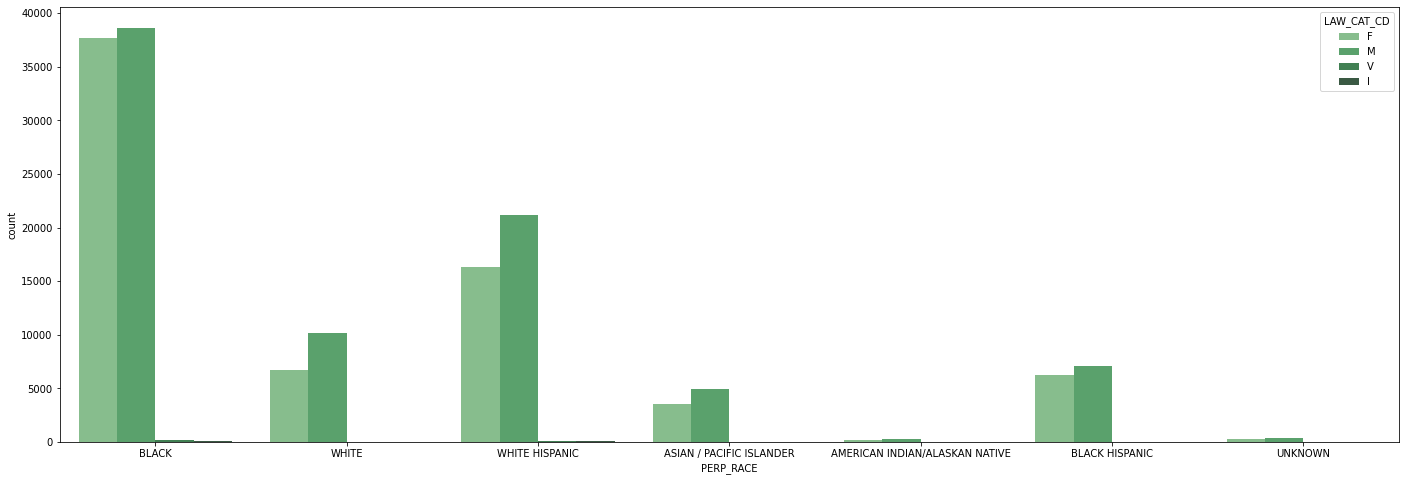

In [61]:
plt.figure(figsize=(24,8))
sns.countplot(x="PERP_RACE", hue='LAW_CAT_CD', data=df, palette="Greens_d")

**Lots of different offenses and many have both misdemenaors and felonies under each category.**

In [62]:
df.groupby(['OFNS_DESC','LAW_CAT_CD']).count()

ARREST_KEY  ARREST_DATE  \
OFNS_DESC                            LAW_CAT_CD                            
ADMINISTRATIVE CODE                  I                    8            8   
                                     M                   26           26   
                                     V                   52           52   
ADMINISTRATIVE CODES                 V                    2            2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M                   72           72   
...                                                     ...          ...   
THEFT-FRAUD                          F                  225          225   
UNAUTHORIZED USE OF A VEHICLE        M                  472          472   
VEHICLE AND TRAFFIC LAWS             F                  183          183   
                                     I                    2            2   
                                     M                 5079         5079   

                                                 PD_CD  PD_DESC  KY_CD  \
OFNS_DESC                            LAW_CAT_CD                          
ADMINISTRATIVE CODE                  I               8        8      8   
                                     M              26       26     26   
                                     V              52       52     52   
ADMINISTRATIVE CODES                 V               2        2      2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M              72       72     72   
...                                                ...      ...    ...   
THEFT-FRAUD                          F             225      225    225   
UNAUTHORIZED USE OF A VEHICLE        M             472      472    472   
VEHICLE AND TRAFFIC LAWS             F             183      183    183   
                                     I               2        2      2   
                                     M            5079     5079   5079   

                                                 LAW_CODE  ARREST_BORO  \
OFNS_DESC                            LAW_CAT_CD                          
ADMINISTRATIVE CODE                  I                  8            8   
                                     M                 26           26   
                                     V                 52           52   
ADMINISTRATIVE CODES                 V                  2            2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M                 72           72   
...                                                   ...          ...   
THEFT-FRAUD                          F                225          225   
UNAUTHORIZED USE OF A VEHICLE        M                472          472   
VEHICLE AND TRAFFIC LAWS             F                183          183   
                                     I                  2            2   
                                     M               5079         5079   

                                                 ARREST_PRECINCT  \
OFNS_DESC                            LAW_CAT_CD                    
ADMINISTRATIVE CODE                  I                         8   
                                     M                        26   
                                     V                        52   
ADMINISTRATIVE CODES                 V                         2   
AGRICULTURE & MRKTS LAW-UNCLASSIFIED M                        72   
...                                                          ...   
THEFT-FRAUD                          F                       225   
UNAUTHORIZED USE OF A VEHICLE        M                       472   
VEHICLE AND TRAFFIC LAWS             F                       183   
                                     I                         2   
                                     M                      5079   

                                                 JURISDICTION_CODE  AGE_GROUP  \
OFNS_DESC                            LAW_CAT_CD                                 
ADMINISTRATIVE CODE                  I                           8          8   
      

In [63]:
df.groupby(['OFNS_DESC']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
OFNS_DESC,,,,,,,,,,,,,,,,,,,
ADMINISTRATIVE CODE,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
ADMINISTRATIVE CODES,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
ALCOHOLIC BEVERAGE CONTROL LAW,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313
ANTICIPATORY OFFENSES,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEX CRIMES,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586
THEFT OF SERVICES,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
THEFT-FRAUD,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225


**Not surprised that more men than women are arrested.** 

In [64]:
df.groupby(['PERP_SEX']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
PERP_SEX,,,,,,,,,,,,,,,,,,,
F,26597,26597,26594,26587,26587,26587,26597,26457,26597,26597,26597,26597,26597,26597,26597,26597,26597,26597,26597
M,128910,128910,128884,128817,128817,128817,128910,127657,128910,128910,128910,128910,128910,128910,128910,128910,128910,128910,128910


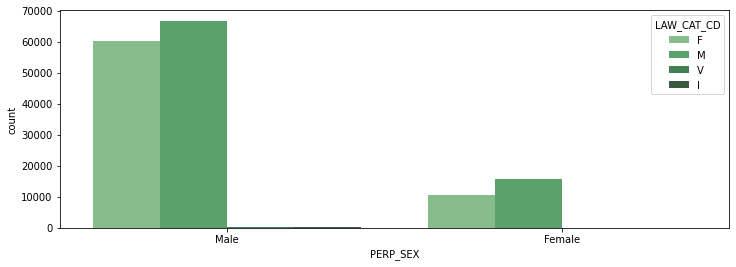

In [65]:
plt.figure(figsize=(12,4))
sns.countplot(x="PERP_SEX", data=df, hue='LAW_CAT_CD', palette="Greens_d")
positions = (0, 1,)
labels = ("Male","Female")
plt.xticks(positions, labels)
plt.show()

**Borough Analysis**

I never realized that Staten Island was so much safer than the other Boroughs.  I may be humping to conclusions here becuase I do believe it is much less populated.  So maybe further analysis on arrests vs population would need to be done.  

In [66]:
df.groupby(['ARREST_BORO']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
ARREST_BORO,,,,,,,,,,,,,,,,,,,
B,34018,34018,34010,34001,34001,34001,34018,33663,34018,34018,34018,34018,34018,34018,34018,34018,34018,34018,34018
K,41550,41550,41544,41524,41524,41524,41550,41338,41550,41550,41550,41550,41550,41550,41550,41550,41550,41550,41550
M,39677,39677,39666,39647,39647,39647,39677,39074,39677,39677,39677,39677,39677,39677,39677,39677,39677,39677,39677
Q,33051,33051,33047,33023,33023,33023,33051,32842,33051,33051,33051,33051,33051,33051,33051,33051,33051,33051,33051
S,7211,7211,7211,7209,7209,7209,7211,7197,7211,7211,7211,7211,7211,7211,7211,7211,7211,7211,7211


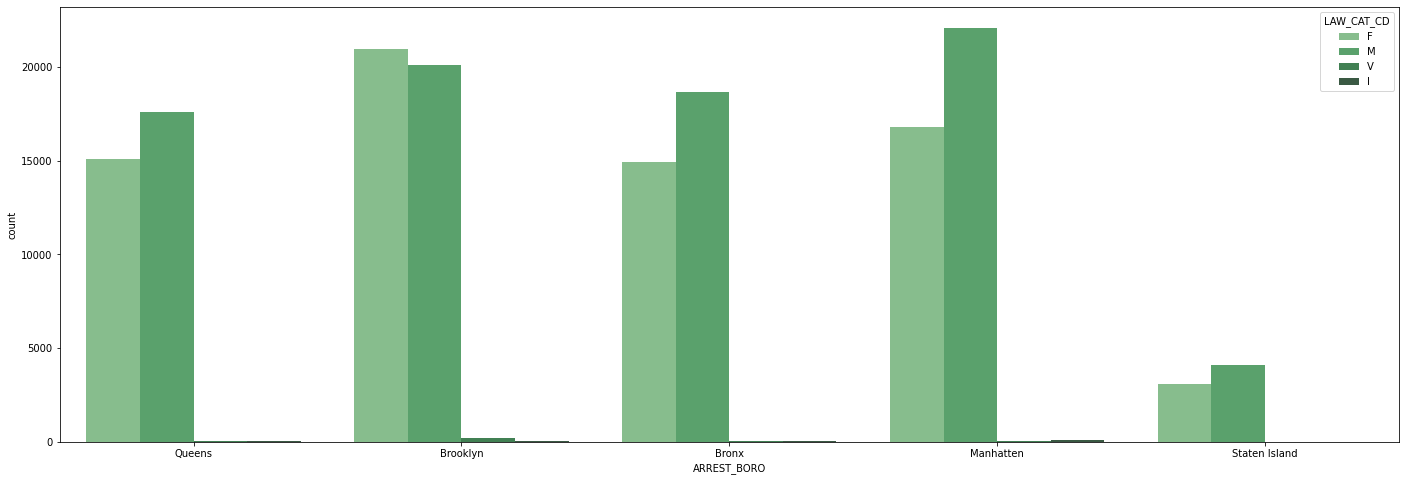

In [67]:
plt.figure(figsize=(24,8))
sns.countplot(x="ARREST_BORO", data=df, hue='LAW_CAT_CD', palette="Greens_d")
positions = (0, 1, 2, 3, 4)
labels = ("Queens","Brooklyn", "Bronx","Manhatten","Staten Island")
plt.xticks(positions, labels)
plt.show()

**Let me think about whittling down my data as I am not so concerned about the misdemeanors.**  

I am more concerned about reducing violent crimes and felonies.  

In [68]:
df.groupby(['LAW_CAT_CD']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
LAW_CAT_CD,,,,,,,,,,,,,,,,,,,
F,70867,70867,70857,70821,70821,70821,70867,70867,70867,70867,70867,70867,70867,70867,70867,70867,70867,70867,70867
I,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230
M,82632,82632,82613,82575,82575,82575,82632,82632,82632,82632,82632,82632,82632,82632,82632,82632,82632,82632,82632
V,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385


In [69]:
df.groupby(['OFNS_DESC']).count()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Arrest Month
OFNS_DESC,,,,,,,,,,,,,,,,,,,
ADMINISTRATIVE CODE,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
ADMINISTRATIVE CODES,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
ALCOHOLIC BEVERAGE CONTROL LAW,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313
ANTICIPATORY OFFENSES,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEX CRIMES,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586,3586
THEFT OF SERVICES,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
THEFT-FRAUD,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225


**Let's now skinny our dataset.**

First - Select only rows for Violent Crimes and Felonies.  

In [70]:
dfviolentall = df[(df['LAW_CAT_CD'] == 'F') | (df['LAW_CAT_CD'] == 'V')]
dfviolentall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71252 entries, 0 to 155506
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                71252 non-null  int64  
 1   ARREST_DATE               71252 non-null  object 
 2   PD_CD                     71242 non-null  float64
 3   PD_DESC                   71206 non-null  object 
 4   KY_CD                     71206 non-null  float64
 5   OFNS_DESC                 71206 non-null  object 
 6   LAW_CODE                  71252 non-null  object 
 7   LAW_CAT_CD                71252 non-null  object 
 8   ARREST_BORO               71252 non-null  object 
 9   ARREST_PRECINCT           71252 non-null  int64  
 10  JURISDICTION_CODE         71252 non-null  int64  
 11  AGE_GROUP                 71252 non-null  object 
 12  PERP_SEX                  71252 non-null  object 
 13  PERP_RACE                 71252 non-null  object 
 14  X_COO

In [71]:
dfviolentall.rename(columns={'ARREST_DATE':'Date of Arrest', 'LAW_CAT_CD':'Violent or Felony','OFNS_DESC':'Descrip of Offense','ARREST_BORO':'Borough', 'AGE_GROUP':'AGE Group','PERP_SEX':'Perp Sex','PERP_RACE':'Perp Race'},inplace=True)
dfviolentall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71252 entries, 0 to 155506
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                71252 non-null  int64  
 1   Date of Arrest            71252 non-null  object 
 2   PD_CD                     71242 non-null  float64
 3   PD_DESC                   71206 non-null  object 
 4   KY_CD                     71206 non-null  float64
 5   Descrip of Offense        71206 non-null  object 
 6   LAW_CODE                  71252 non-null  object 
 7   Violent or Felony         71252 non-null  object 
 8   Borough                   71252 non-null  object 
 9   ARREST_PRECINCT           71252 non-null  int64  
 10  JURISDICTION_CODE         71252 non-null  int64  
 11  AGE Group                 71252 non-null  object 
 12  Perp Sex                  71252 non-null  object 
 13  Perp Race                 71252 non-null  object 
 14  X_COO

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Let's now skinny our new violent crime dataset even further by only selecting pertinet columns.**

Let's rename those columns.

In [72]:
dfviolent = dfviolentall[['Date of Arrest','Descrip of Offense','Violent or Felony','Borough','AGE Group','Perp Sex','Perp Race','Arrest Month']]
dfviolent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71252 entries, 0 to 155506
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date of Arrest      71252 non-null  object
 1   Descrip of Offense  71206 non-null  object
 2   Violent or Felony   71252 non-null  object
 3   Borough             71252 non-null  object
 4   AGE Group           71252 non-null  object
 5   Perp Sex            71252 non-null  object
 6   Perp Race           71252 non-null  object
 7   Arrest Month        71252 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 4.9+ MB


In [73]:
dfviolent.head(5)

,Date of Arrest,Descrip of Offense,Violent or Felony,Borough,AGE Group,Perp Sex,Perp Race,Arrest Month
0,12/18/2021,RAPE,F,Q,18-24,M,BLACK,12
1,11/25/2021,ARSON,F,K,25-44,M,BLACK,11
2,10/14/2021,SEX CRIMES,F,K,25-44,M,WHITE,10
3,10/11/2021,ARSON,F,B,18-24,M,BLACK,10
5,09/27/2021,RAPE,F,K,25-44,M,BLACK,9


In [74]:
dfviolent.groupby(['Violent or Felony']).count()

,Date of Arrest,Descrip of Offense,Borough,AGE Group,Perp Sex,Perp Race,Arrest Month
Violent or Felony,,,,,,,
F,70867,70821,70867,70867,70867,70867,70867
V,385,385,385,385,385,385,385


**Repeat same analysis / charts to understand impact of Arrest Month, Age, Race,Gender and Borough on the nbumber of arrests.**

The same message resonantes with these charts: 
Date of crime seems to have minimal significance;  October is the month with most arrests, April has the least.  
Gender has high-signficance in arrest data. Males are much more likely to get arrested for serious crimes.
Age has fairly high significance. The 65+ and < 18 group has very low arrests.
Four of the five boroughs had similar arrest counts. Staten Island was significant lower than the other NYC boroughs. 
Race is a major factor 'Black' and 'White Hisplanic' had significantly more  arrests than the other races.  

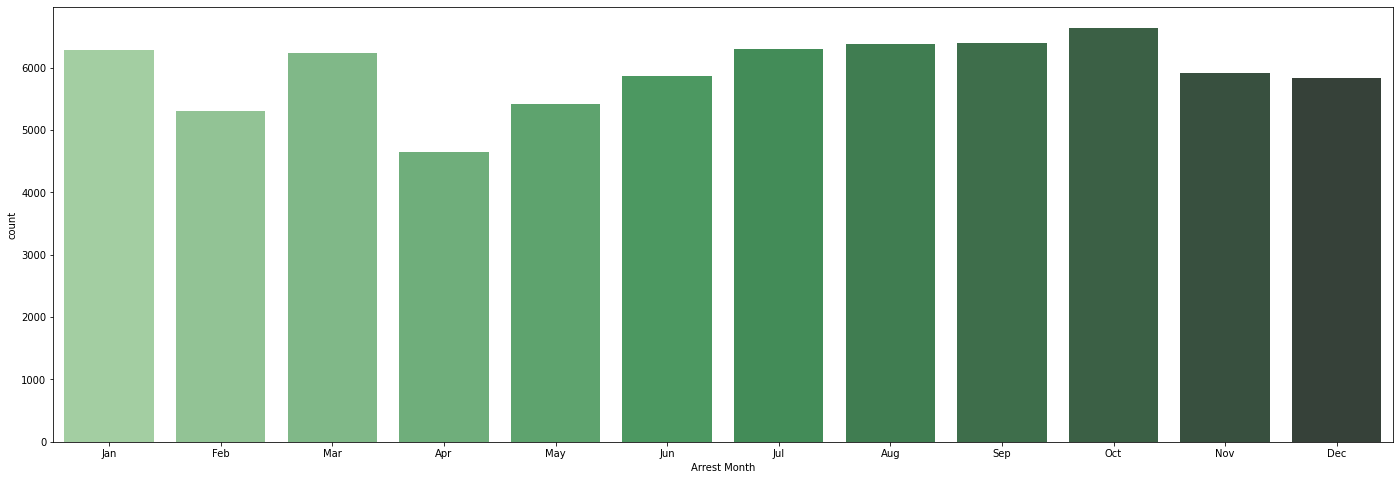

In [75]:
plt.figure(figsize=(24,8))
sns.countplot(x="Arrest Month", data=dfviolent, palette="Greens_d")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels = ("Jan","Feb", "Mar","Apr","May", "Jun", "Jul","Aug", "Sep", "Oct","Nov", "Dec")
plt.xticks(positions, labels)
plt.show()

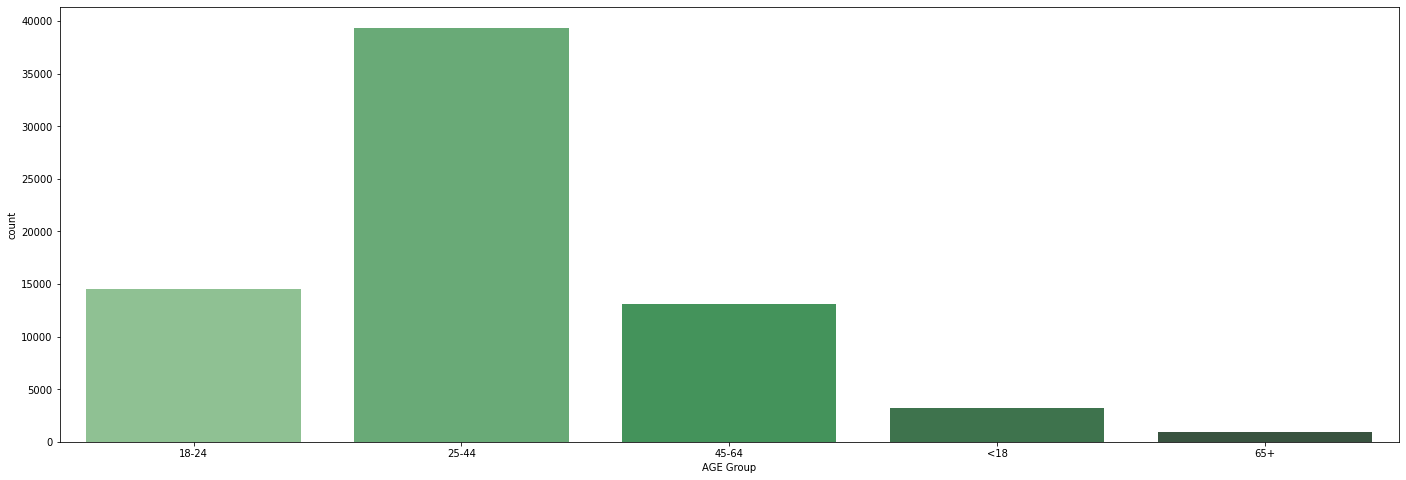

In [76]:
 plt.figure(figsize=(24,8))
 sns.countplot(x="AGE Group",data=dfviolent, palette="Greens_d")

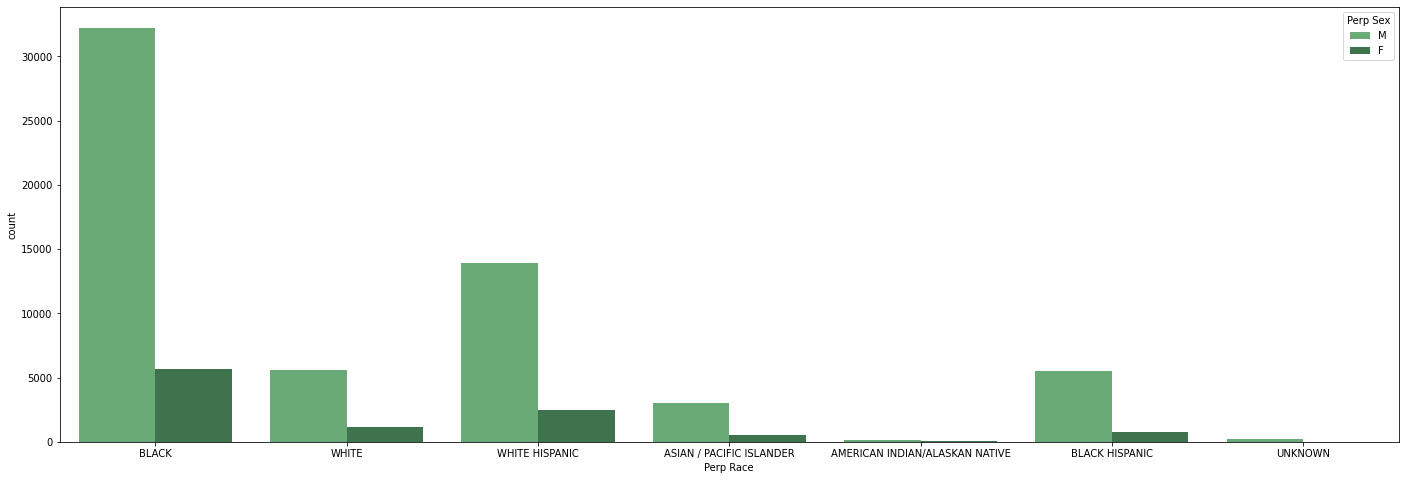

In [77]:
plt.figure(figsize=(24,8))
sns.countplot(x="Perp Race", hue='Perp Sex', data=dfviolent, palette="Greens_d")

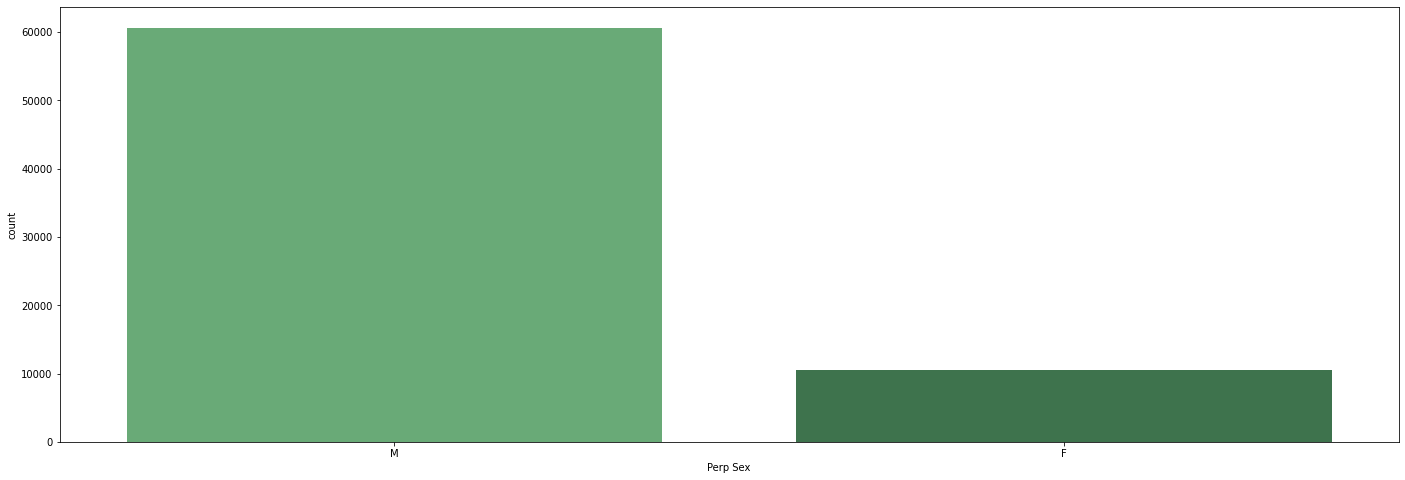

In [80]:
plt.figure(figsize=(24,8))
sns.countplot(x="Perp Sex", data=dfviolent, palette="Greens_d")

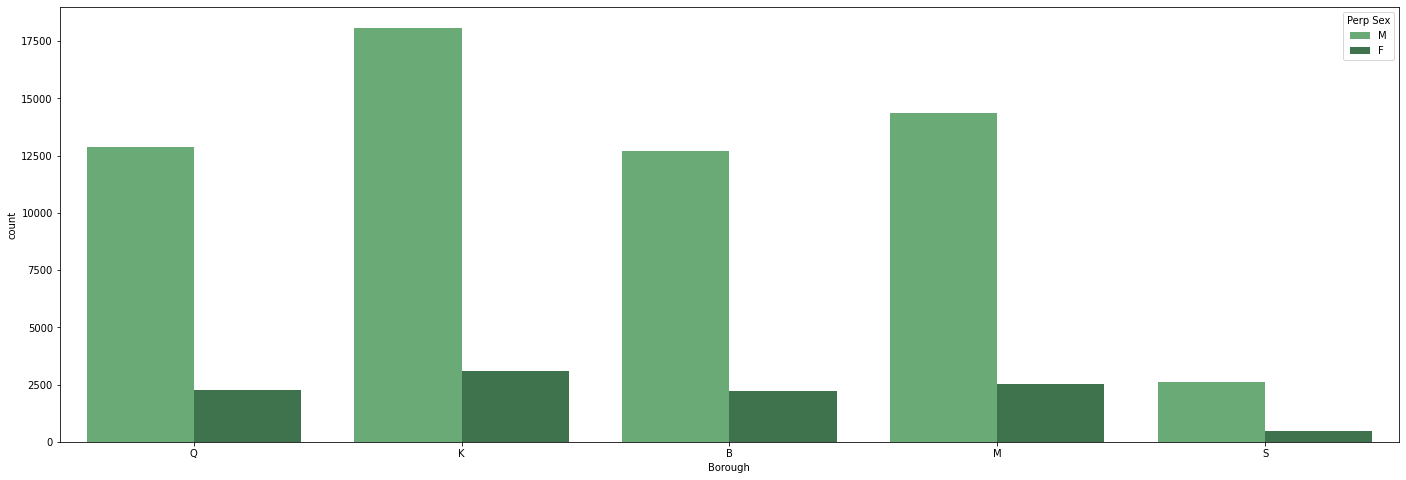

In [79]:
plt.figure(figsize=(24,8))
sns.countplot(x="Borough", hue='Perp Sex', data=dfviolent, palette="Greens_d")